Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 3)
Team shape: (155541, 33)
Opponent shape: (155541, 33)
Total shape: (88002, 71)

=== DataFrame Overview ===
Shape: (88002, 71)

Columns:
['Time', 'half', 'Ball_x', 'Ball_y', 'game', 'FCKplayer_0_x', 'FCKplayer_0_y', 'FCKplayer_0_number', 'FCKplayer_1_x', 'FCKplayer_1_y', 'FCKplayer_1_number', 'FCKplayer_2_x', 'FCKplayer_2_y', 'FCKplayer_2_number', 'FCKplayer_3_x', 'FCKplayer_3_y', 'FCKplayer_3_number', 'FCKplayer_4_x', 'FCKplayer_4_y', 'FCKplayer_4_number', 'FCKplayer_5_x', 'FCKplayer_5_y', 'FCKplayer_5_number', 'FCKplayer_6_x', 'FCKplayer_6_y', 'FCKplayer_6_number', 'FCKplayer_7_x', 'FCKplayer_7_y', 'FCKplayer_7_number', 'FCKplayer_8_x', 'FCKplayer_8_y', 'FCKplayer_8_number', 'FCKplayer_9_x', 'FCKplayer_9_y', 'FCKplayer_9_number', 'FCKplayer_10_x', 'FCKplayer_10_y', 'FCKplayer_10_number', 'RFCplayer_0_x', 'RFCplayer_0_y

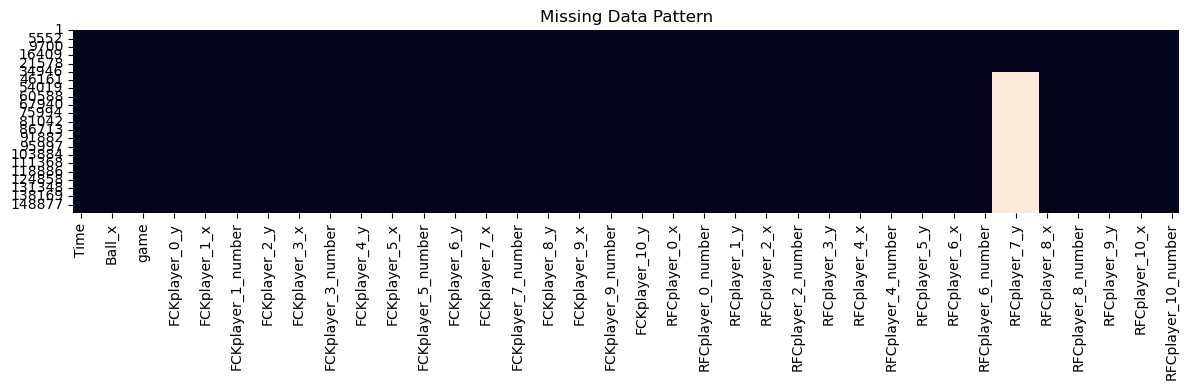

In [1]:
#In this code I'm going to see if we can train a NN from one game and have it predict positions from the next game
#Importing the libraries
from data_loader import FootballDataLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU


In [2]:
#Preparing training and testing data
data_dir = r"\Users\kirlo\Documents\Sanvi University Work\Year 3\AML\final project\FootballData\RestructuredData_2425"  # replace with your actual data directory
team = "FCK"         
data_retriever = FootballDataLoader(data_dir, team)
all_games = data_retriever.load_all_games(n_games= 2)
training_game = all_games[0]
testing_game = all_games[1]

Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 6)
Team shape: (155541, 55)
Opponent shape: (155541, 55)
Total shape: (88002, 118)
Reading game 2: Game_FCK_VFF_Score_1_1_Day_2024-08-18Z.pkl
Loading Game_FCK_VFF_Score_1_1_Day_2024-08-18Z.pkl
Data read.
Time shape: (158121, 2)
Ball shape: (158121, 6)
Team shape: (158121, 55)
Opponent shape: (158121, 55)
Total shape: (90691, 118)


Epoch 1/10


c:\Users\kirlo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 40.4383 - val_loss: 0.0913
Epoch 2/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0669 - val_loss: 0.0880
Epoch 3/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0392 - val_loss: 0.0914
Epoch 4/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0803 - val_loss: 0.0854
Epoch 5/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0567 - val_loss: 0.0883
Epoch 6/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0833 - val_loss: 0.0852
Epoch 7/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0553 - val_loss: 0.1236
Epoch 8/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0636 - val_loss: 0.0905
Epoch 9/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0636 - val_loss: 0.0858
Epoch 10/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0602 - val_loss: 0.0893
2835/2835 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


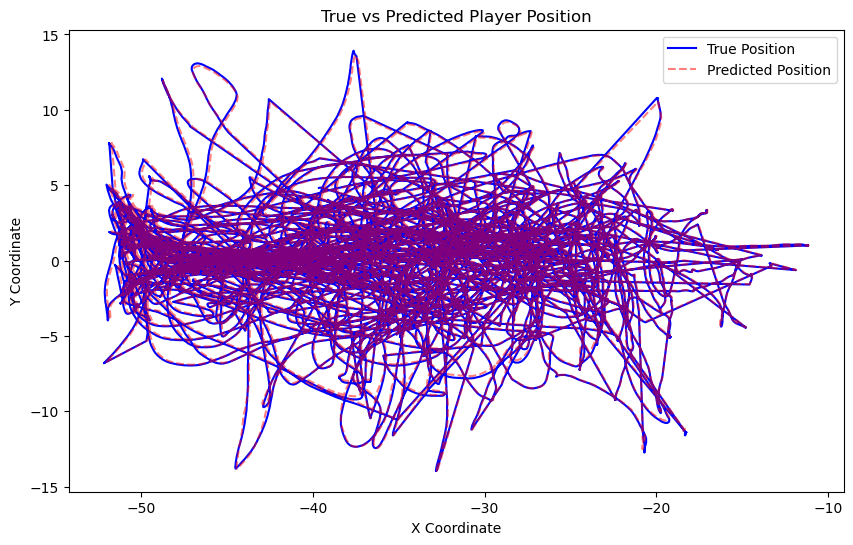

In [14]:
#Then from here its basically the same thing as with the other game. Start with the training game
train_n_time_steps = training_game.shape[0]
train_positions = training_game[['FCKplayer_0_x', 'FCKplayer_0_y']].values

train_X = []
train_y = []

for i in range(train_n_time_steps - 1):
    train_X.append(train_positions[i])
    train_y.append(train_positions[i + 1])
train_X_reshaped = np.array(train_X)
train_y_reshaped = np.array(train_y)

# Reshape for RNN: (samples, timesteps, features)
train_X_reshaped = train_X_reshaped.reshape((train_X_reshaped.shape[0], 1, train_X_reshaped.shape[1]))
train_y_reshaped = train_y_reshaped.reshape((train_y_reshaped.shape[0], 2))

#Creating the RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(1, 2)))
model.add(Dense(50, activation='relu'))
model.add(Dense(2))  # Output layer for x and y coordinates
model.compile(optimizer='adam', loss='mse')
#Training the model
model.fit(train_X_reshaped, train_y_reshaped, epochs=10, batch_size=32, validation_split=0.2)
#Evaluating the model
test_positions = testing_game[['FCKplayer_0_x', 'FCKplayer_0_y']].values
test_X = []
test_y = []
test_n_time_steps = testing_game.shape[0]
for i in range(test_n_time_steps - 1):
    test_X.append(test_positions[i])
    test_y.append(test_positions[i + 1])
test_X_reshaped = np.array(test_X)
test_y_reshaped = np.array(test_y)
# Reshape test_X_reshaped for RNN input
test_X_reshaped = test_X_reshaped.reshape((test_X_reshaped.shape[0], 1, test_X_reshaped.shape[1]))
predictions = model.predict(test_X_reshaped)
#Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_y_reshaped[:, 0], test_y_reshaped[:, 1], label='True Position', color='blue')
plt.plot(predictions[:, 0], predictions[:, 1], label='Predicted Position', color='red', alpha=0.5, linestyle='--')
plt.title('True vs Predicted Player Position')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()



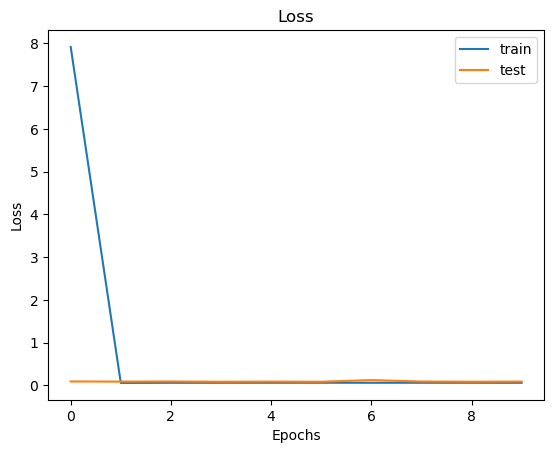

In [15]:
#Plotting loss
history = model.history.history
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()